In [62]:
import glob
import numpy as np
import pandas as pd
import os
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

## Data Preprocessing

In [4]:
#Reading the dataset

df1 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2009-10')
df2 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2010-11')
df3 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2011-12')
df4 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2012-13')
df5 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2013-14')
df6 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2014-15')
df7 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2015-16')
df8 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2016-17')
df9 = pd.read_excel(r'C:\Users\aanum\OneDrive\Documents\AML_project\Football\EPL_2009-18.xls', sheet_name='2017-18')
df1=df1[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df2=df2[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df3=df3[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df4=df4[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df5=df5[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df6=df6[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df7=df7[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df8=df8[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]
df9=df9[["HomeTeam","AwayTeam","FTHG","FTAG","Date","AST","HST","HC","AC","B365H","B365D","B365A"]]


In [46]:
#Concatenating the datasets
result=pd.concat([df1,df2, df3, df4, df5, df6, df7, df8, df9])
result.shape

(3420, 12)

In [47]:
#Converting the date into date time format
result['Date'] = pd.to_datetime(result['Date'])
result = result.sort_values(by=['Date'],ascending=True)
result.shape

(3420, 12)

In [48]:
#Splitting the date to Month,Time and Year
result['Year'] = pd.DatetimeIndex(result['Date']).year
result['Month'] = pd.DatetimeIndex(result['Date']).month
result['Day'] = pd.DatetimeIndex(result['Date']).day
result=result.drop(['Date'],axis=1)
result


,HomeTeam,AwayTeam,FTHG,FTAG,AST,HST,HC,AC,B365H,B365D,B365A,Year,Month,Day
105,Birmingham,Man City,0,0,6,4,4,8,4.33,3.60,1.83,2009,1,11
66,Bolton,Tottenham,2,2,9,9,5,6,3.80,3.60,1.95,2009,3,10
67,Burnley,Birmingham,2,1,6,13,8,4,2.30,3.25,3.20,2009,3,10
70,Wolves,Portsmouth,0,1,8,5,8,6,2.00,3.40,3.80,2009,3,10
69,Man United,Sunderland,2,2,3,9,14,1,1.20,6.50,15.00,2009,3,10
68,Hull,Wigan,2,1,5,6,4,2,2.88,3.30,2.50,2009,3,10
74,West Ham,Fulham,2,2,6,10,8,4,2.20,3.25,3.40,2009,4,10
73,Everton,Stoke,1,1,6,17,11,4,1.57,4.00,6.00,2009,4,10
72,Chelsea,Liverpool,2,0,3,8,5,8,2.10,3.30,3.60,2009,4,10
71,Arsenal,Blackburn,6,2,7,18,8,1,1.20,6.50,15.00,2009,4,10


In [49]:
#One hot encoding of the teams
result = pd.get_dummies(result, columns=['HomeTeam','AwayTeam'])
conditions = [
    result['FTHG'] > result['FTAG'] , result['FTHG'] < result['FTAG'], 
    result['FTHG'] == result['FTAG']]

choices = [1, 2,0]
result['winner'] = np.select(conditions, choices, default=0)
result


,FTHG,FTAG,AST,HST,HC,AC,B365H,B365D,B365A,Year,...,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,winner
105,0,0,6,4,4,8,4.33,3.60,1.83,2009,...,0,0,0,0,0,0,0,0,0,0
66,2,2,9,9,5,6,3.80,3.60,1.95,2009,...,0,0,0,1,0,0,0,0,0,0
67,2,1,6,13,8,4,2.30,3.25,3.20,2009,...,0,0,0,0,0,0,0,0,0,1
70,0,1,8,5,8,6,2.00,3.40,3.80,2009,...,0,0,0,0,0,0,0,0,0,2
69,2,2,3,9,14,1,1.20,6.50,15.00,2009,...,0,1,0,0,0,0,0,0,0,0
68,2,1,5,6,4,2,2.88,3.30,2.50,2009,...,0,0,0,0,0,0,0,1,0,1
74,2,2,6,10,8,4,2.20,3.25,3.40,2009,...,0,0,0,0,0,0,0,0,0,0
73,1,1,6,17,11,4,1.57,4.00,6.00,2009,...,1,0,0,0,0,0,0,0,0,0
72,2,0,3,8,5,8,2.10,3.30,3.60,2009,...,0,0,0,0,0,0,0,0,0,1
71,6,2,7,18,8,1,1.20,6.50,15.00,2009,...,0,0,0,0,0,0,0,0,0,1


## Exploratory DataAnalysis

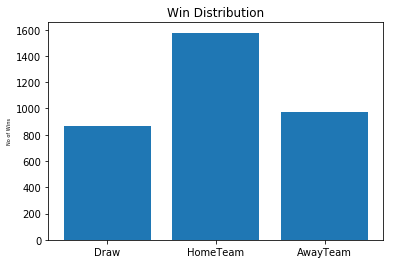

In [78]:
aggregated_wins = result.groupby('winner').count()['FTHG']
index = ['Draw','HomeTeam','AwayTeam']
plt.bar(index, aggregated_wins)
plt.xlabel('', fontsize=5)
plt.ylabel('No of Wins', fontsize=5)
#plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Win Distribution')


plt.show()

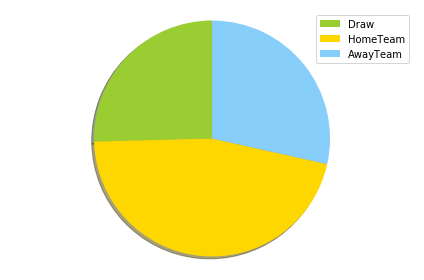

In [79]:
labels = ['Draw', 'HomeTeam', 'AwayTeam']
sizes = aggregated_wins
colors = ['yellowgreen', 'gold', 'lightskyblue']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\aanum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196D7F56D30>,
      dtype=object)

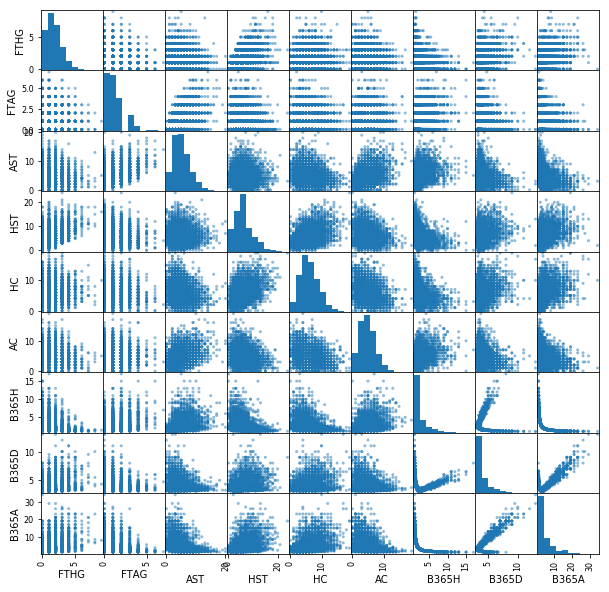

In [75]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(result[['FTHG','FTAG','AST','HST','HC','AC','B365H','B365D','B365A']], figsize=(10,10))

In [55]:
#Splitting the dataset to training and testing
from sklearn.model_selection import train_test_split

x = result.drop(["winner","FTHG","FTAG"],axis=1)
y = result["winner"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 20)


## BaseLine Model


In [82]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()
logistic.fit(xTrain , yTrain)
y = logistic.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest))

Accuracy: 0.5453216374269005


## ML models

#### Logistic Regression HyperParameter Tuning

In [84]:

# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(xTrain, yTrain)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 166.81005372000593


In [87]:
y = best_model.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest))

Accuracy: 0.5380116959064327


#### SVM

In [89]:
from sklearn import svm
clf = svm.SVC()
clf.fit(xTrain , yTrain)
y = clf.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest)) 

Accuracy: 0.5584795321637427


In [92]:
# SVM Parameter Tuning
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=2)
grid_search.fit(xTrain, yTrain)
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [91]:
y = grid_search.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest))

Accuracy: 0.5701754385964912


#### KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(xTrain,yTrain)
y = knn.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest)) 

Accuracy: 0.489766081871345


In [95]:
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(xTrain, yTrain)
y = knn_gscv.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest)) 

Accuracy: 0.5233918128654971


#### RandomForest Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
tree.fit(xTrain, yTrain)
y = knn.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest)) 

Accuracy: 0.489766081871345


In [101]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(xTrain, yTrain)
y = knn.predict(xTest)
print("Accuracy:",metrics.accuracy_score(y,yTest)) 

Accuracy: 0.489766081871345
